<a href="https://colab.research.google.com/github/ericmermet/tse/blob/master/TSE_webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A : (Easy) Web Scraping with Python

# Objectives:
# - Understand the basics of web scraping
# - Use the requests and BeautifulSoup libraries
# - Extract data from a web page
# - Analyze and process the extracted data

## Introduction
Web scraping is a technique used to extract information from websites. This lab will guide you through the basic steps of web scraping in Python using the requests and BeautifulSoup libraries.

1. Installing the necessary libraries
Before starting, make sure you have installed the requests and BeautifulSoup libraries. You can install them via pip if you haven't already.

In [1]:
!pip install requests
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: C:\Program Files\Inkscape\bin\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   --------------------------------- ------ 122.9/147.9 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 147.9/147.9 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: C:\Program Files\Inkscape\bin\python.exe -m pip install --upgrade pip


## 2. Importing the libraries
We start by importing the necessary libraries for our web scraping task.

In [4]:
import requests

# https://requests.readthedocs.io/en/latest/

from beautifulsoup4 import BeautifulSoup

# https://www.crummy.com/software/BeautifulSoup/bs4/doc/

ModuleNotFoundError: No module named 'beautifulsoup4'

## 3. Retrieving the content of a web page
We will retrieve the HTML content of a web page using requests.

In [ ]:
url = 'https://www.tse-fr.eu/'  # Remplacez par l'URL que vous souhaitez scraper
response = requests.get(url)


# Vérifions que la requête a réussi
if response.status_code == 200:
    print("Page récupérée avec succès")
else:
    print("Échec de la récupération de la page")

Page récupérée avec succès


## 4. Parsing the HTML content with BeautifulSoup
Once we have retrieved the HTML content, we can parse it with BeautifulSoup.

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')

## 5. Extracting data
We will now extract specific data from the page. For example, we can extract all article titles (assuming the titles are in <h2> tags).

In [ ]:
titles = soup.find_all('h2')
for title in titles:
    print(title.get_text())

Search form
About
People
Research
Study
Events
Get involved
News & Press

The Banque de France and TSE have awarded prizes to six researchers for their work in monetary economics and finance


Congratulations to Sebastien Montpetit!


Esteban MUNOZ SOBRADO PhD thesis, June 26th


Appointment: Christian Gollier

Admissions
All news
Debate
Selected publications
Job Market Candidates 2023-2024
Latest TSE Mag 
Alumni
Media
Giving to TSE
« TSE is like a living library where the books come and talk to you »
Key Figures


## 6. Saving the data
We can save the extracted data to a file for later analysis.

In [ ]:
with open('titles.txt', 'w') as f:
    for title in titles:
        f.write(title.get_text() + '\n')

## 7. Analyzing and processing the data
You can now analyze and process the extracted data. For example, count the number of titles, find keywords, etc.

In [ ]:
print(f"Nombre de titres extraits: {len(titles)}")

Nombre de titres extraits: 23


## Conclusion
You now have the basics of web scraping with Python. Try exploring other pages and extracting different data to deepen your skills.

## Part B : Webscrapping french maps archive

In [ ]:
#installs (if needed) and imports
#!pip install requests
#!pip install beautifulsoup4

import requests
# https://requests.readthedocs.io/en/latest/

from bs4 import BeautifulSoup
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/

import requests

Observe the structure of the page :

Go to : https://archives.haute-garonne.fr/

Search page for "archives figurés (Images archives)" :
https://archives.haute-garonne.fr/archive/recherche/icono/n:2

But you need to set subject to : carte, cadastre, etc.
Giving an url that look like :
https://archives.haute-garonne.fr/archive/recherche/icono/n:2




Try a search then observe

In [ ]:
#nb of results by page
limit = 20;

query = ''
page = 1

import re



url = f"find the url and add parameters"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

response = requests.get(url, headers=headers)

print(url)

if response.status_code == 200:
    # print(response.content)
    soup = BeautifulSoup(response.content, 'html.parser')

    nbr_reponses_div = soup.find("span", class_="TO DO : find the right class to obtain the number of images")
    nbr_reponses = nbr_reponses_div.text.strip() if nbr_reponses_div else "Nan"

    data_dict = {"nb_responses": nbr_reponses,
                  "requested_url" : url,
                  "records": []}

    divs = soup.find_all("div", id=lambda x: x and x.startswith('TODO : find the id for all image cards') and x.endswith('0'))

    ark_regex = re.compile(r'/ark:/\d+/[a-zA-Z0-9]+')

    for div in divs:

        record = {}

        record['id'] = div.get('id')

        # div_info = {}

        # Looking for the div image
        img_div = div.find("div", class_="TODO : find the class for the image div")
        # If exists, extract the url
        if img_div and img_div.find("img"):
            record['image_url'] = img_div.find("img")['src']

        # Looking for the title div for the title
        descr_div = div.find("div", class_="TODO : find the title div")
        # If exists, extract the text
        if descr_div:
            record['title'] = descr_div.text.strip()

        #extract the link element a to conserve a link to the source
        links = div.find_all("a", href=True)
        for link in links:
            href = link['href']
            if 'idsearch' in href:
                continue
            if ark_regex.match(href):
                record['ark_link'] = href
                break

        data_dict["records"].append(record)

https://archives.haute-garonne.fr/archive/resultats/icono/n:2/limit:20/page:1?rech_s=&RECH_subject_Index=235197%7C146608%7C146917%7C146568%7C&RECH_subject_Libel=carte%7Ccarte%7Ccartographie%7Ccadastre%7C&RECH_bdao=1&type=icono&RECH_Field=RECH_subject&RECH_Letter=C


In [ ]:
data_dict

{'nb_responses': '7771 réponses dans 36 inventaires',
 'requested_url': 'https://archives.haute-garonne.fr/archive/resultats/icono/n:2/limit:20/page:1?rech_s=&RECH_subject_Index=235197%7C146608%7C146917%7C146568%7C&RECH_subject_Libel=carte%7Ccarte%7Ccartographie%7Ccadastre%7C&RECH_bdao=1&type=icono&RECH_Field=RECH_subject&RECH_Letter=C',
 'records': [{'id': 'arc_vign_366302_0',
   'image_url': 'https://archives.haute-garonne.fr/cgi-bin/iipsrv.fcgi?FIF=%2Fhome%2Fhttpd%2Fad31%2Fdiffusion%2Fprod%2Fapp%2Fwebroot%2Fdata%2Ffiles%2Fad31.diffusion%2Fimages%2Falto_jpg%2FGed45%2FThot%2FFI%2F2_O%2F2_O_12%2FFRAD031_00001_FI_000433.jpg&HEI=240&QLT=80&CVT=JPG&SIZE=474468&MTIME=1558102479',
   'title': '(1 vue)Carte des Chemins de S.[Saint-]Jacques de Compostelle 1648 / D. Derveaux, sculp. - Echelle : en lieues. - [s.l.] : [s.n.], [s.d.]. - Carte',
   'ark_link': '/ark:/44805/vtaa41437c25b1e8164/n:2'},
  {'id': 'arc_vign_366482_0',
   'image_url': '/data/files/ad31.diffusion/images/Ged45/Thot/GedInte

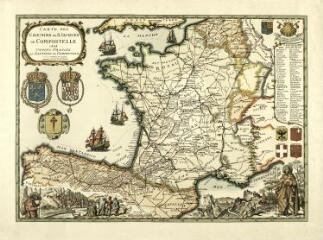

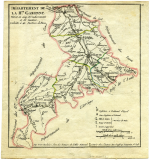

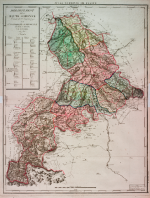

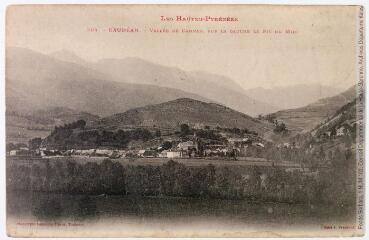

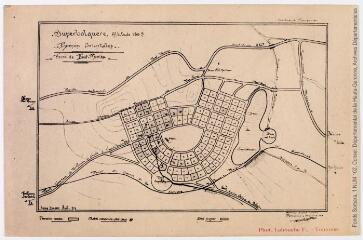

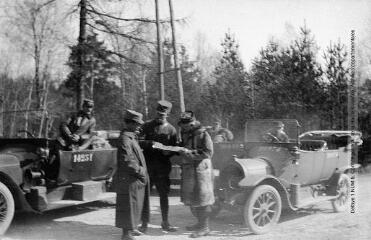

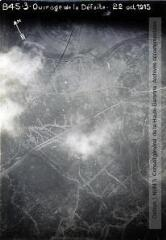

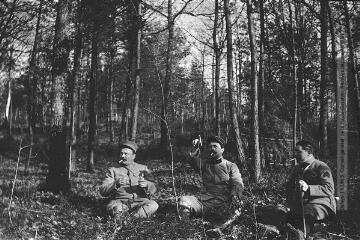

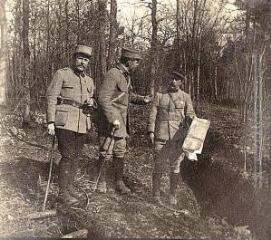

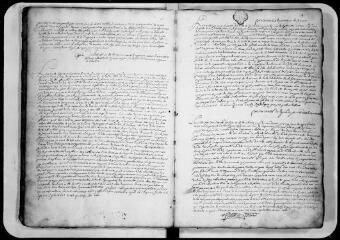

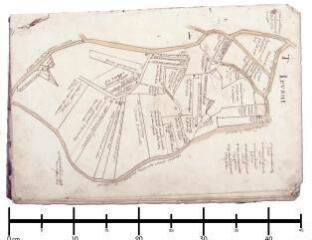

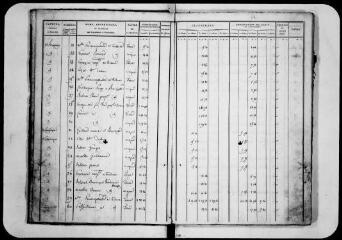

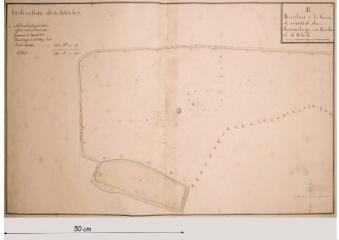

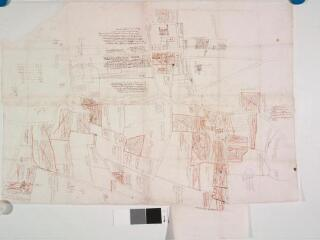

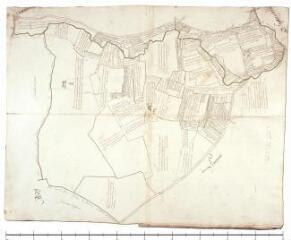

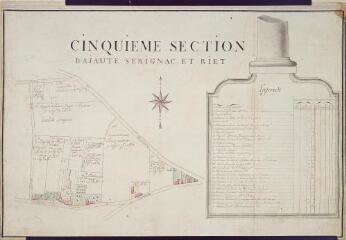

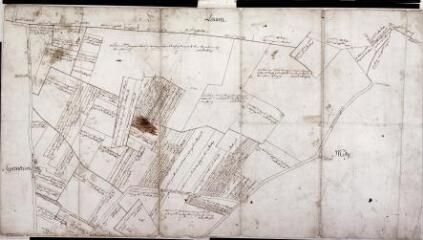

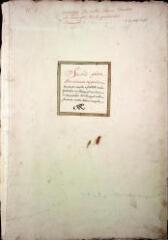

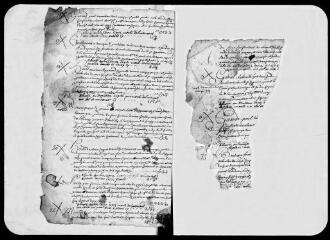

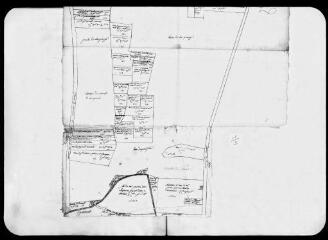

In [ ]:
#Display

import requests
from IPython.display import display, Image
from PIL import Image as PILImage, UnidentifiedImageError
from io import BytesIO
from urllib.parse import urlparse, parse_qs


# Fonction pour extraire iiif highres de l'URL de l'image
def get_highres_url(image_url):
    # Extraire la valeur du paramètre FIF de l'URL

    #Because High res url looks like : https://archives.haute-garonne.fr/iiif/mnt/disk1/cache/ad31_diffusion/alto_jpg/Ged45/Thot/FI/2_O/2_O_12/FRAD031_00001_FI_000433/FOND.TIF/0,0,256,256/256,/0/native.jpg

    parsed_url = urlparse(image_url)
    query_params = parse_qs(parsed_url.query)

    fif_param = query_params.get('FIF', [None])[0]

    if fif_param:
        # Utiliser une expression régulière pour extraire la partie désirée
        pattern = re.compile(r'decoupepdf.*?(?=\.jpg)')
        match_url = pattern.search(fif_param)

        if match_url:
            highres_url = f'https://archives.haute-garonne.fr/iiif/mnt/disk1/cache/ad31_diffusion/{match_url.group(0)}/FOND.TIF/full/full/0/native.jpg'
            return highres_url

    return None

# Fonction pour afficher les vignettes
def display_thumbnails(records):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    for record in records:
        image_url = record['image_url']

        # Si l'URL ne contient pas le domaine, ajoutez-le
        if image_url.startswith('/'):
            image_url = 'https://archives.haute-garonne.fr' + image_url

        # Récupérer et afficher l'image
        try:
            response = requests.get(image_url, headers=headers)
            response.raise_for_status()
            img = PILImage.open(BytesIO(response.content))
            display(Image(data=response.content))
        except (requests.RequestException, UnidentifiedImageError) as e:
            print(f"Error fetching or displaying image {image_url}: {e}")

# Afficher les vignettes des images
display_thumbnails(data_dict['records'])

Have a look to https://dev.ptm.huma-num.fr/cartoquete/

for webscrapping on the fly